<a href="https://colab.research.google.com/github/rorschach02/Medical-Insurance-Cost/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
medi = pd.read_csv("Medical cost.csv")
medi.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medi.shape


(1338, 7)

In [5]:
medi.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medi.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Description of dataset (Categorical):
medi.describe(include=['O'])


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


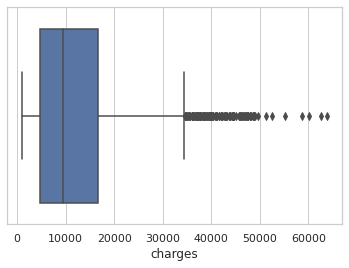

In [8]:
# Boxplot of Medical Insurance Charges:

sns.set_theme(style="whitegrid")
sns.boxplot(medi['charges'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


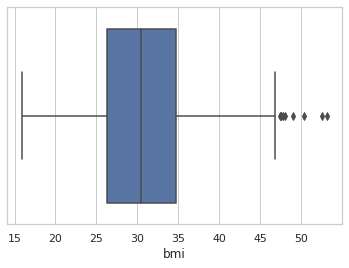

In [9]:
sns.boxplot(medi['bmi'])


In [10]:
medi[['sex','age']].groupby('sex').agg(['mean','count'])


age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [11]:
medi['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
medi[['sex','children']].groupby('sex').agg(['mean'])


,children
,mean
sex,
female,1.074018
male,1.115385


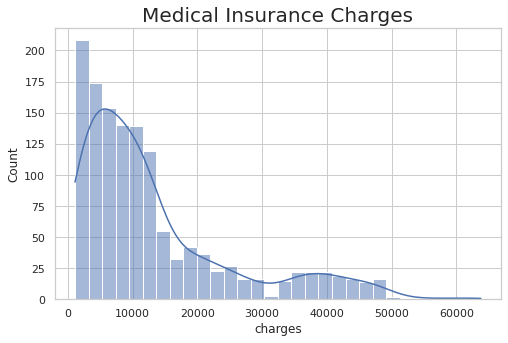

In [13]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(medi['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()


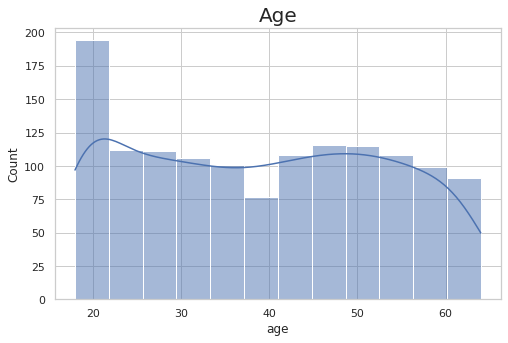

In [14]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(medi['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()


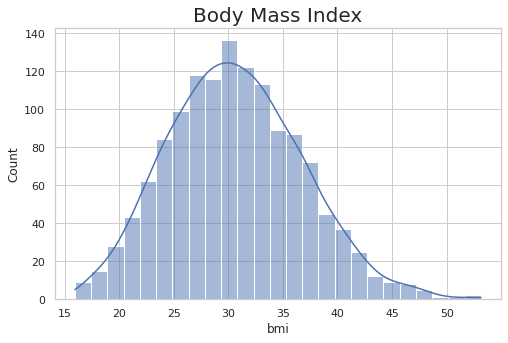

In [15]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(medi['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()


Male   : 676
Female : 662


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


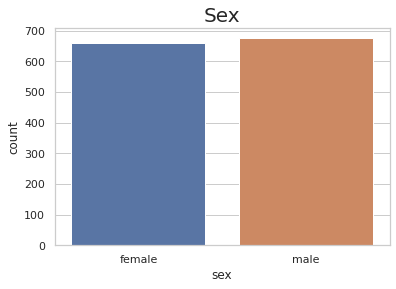

In [16]:
# Value Counts:
print("Male   :", medi['sex'].value_counts()[0])
print("Female :", medi['sex'].value_counts()[1])

# Visualization:
plt.figure(figsize=(6,4))
sns.countplot(medi['sex'])
plt.title('Sex', fontsize=20)
plt.show()


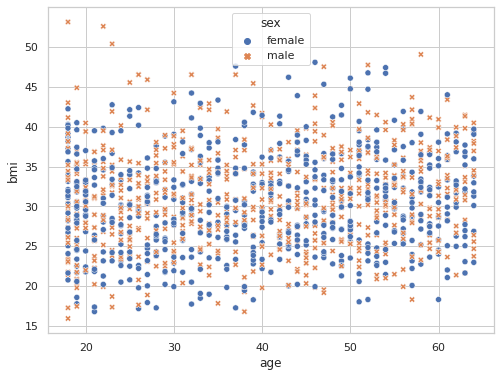

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=medi, x="age", y="bmi", hue="sex", style="sex")


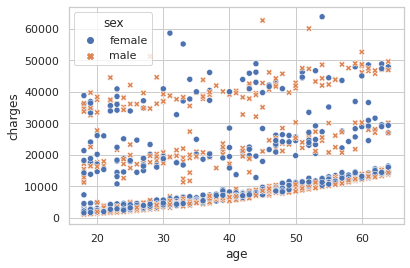

In [18]:
sns.scatterplot(data=medi, x="age", y="charges", hue="sex", style="sex")


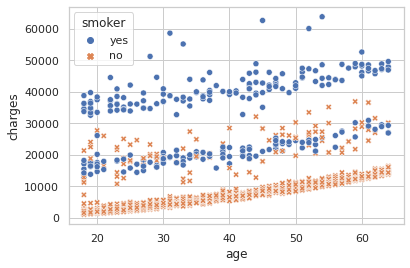

In [19]:
sns.scatterplot(data=medi, x="age", y="charges", hue="smoker", style="smoker")


In [20]:
# First removing outlier values:

medi = medi[medi['bmi'] < 47]
# medi = medi[medi['charges'] < 25000]

medi.shape


(1329, 7)

In [21]:
# Finding categorical data:

medi['smoker'].value_counts()


no     1058
yes     271
Name: smoker, dtype: int64

In [22]:
# Rounding up & down Age:
medi['age'] = round(medi['age'])


In [23]:
# Encoding:
medi = pd.get_dummies(medi, drop_first=True)


In [25]:
train_data = medi

In [26]:
# Rearranging columns to see better: 
train_data = train_data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
train_data.head(2)


,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,19,0,1,27.90,0,0,0,1,16884.9240
1,18,1,0,33.77,1,0,1,0,1725.5523


In [27]:
# Splitting Independent & Dependent Feature:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]


In [28]:
# top 2 records of Independent feature:
X.head(2)


,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,19,0,1,27.90,0,0,0,1
1,18,1,0,33.77,1,0,1,0


In [29]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


## ML Models

In [30]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7044166814277582
50378199.67436567


#### Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7039566431354107
50456607.01163244


#### Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7044215283147532
50377373.587690614


#### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7962884367552284
34719895.08303067


## Saving the Model:

In [38]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))
